#
    import data
    cleaning
    feature selc
    choose segmentation variables
    methods--(algo in classification -DBSCAN Kmeans, rfm)
    analysis of segmentation
    
    
    --- add if any required--

In [90]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
## load data set
data = pd.read_csv('fake_transactional_data_24.csv')
## head
data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [92]:
data.isnull()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
10148275,False,False,False,False
10148276,False,False,False,False
10148277,False,False,False,False
10148278,False,False,False,False


In [93]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 from_totally_fake_account        0
monopoly_money_amount            0
to_randomly_generated_account    0
not_happened_yet_date            0
dtype: int64


In [94]:
# Convert date column to datetime
### may useful for Time Series Analysis

data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')
data['not_happened_yet_date']

0          2025-01-01
1          2025-01-01
2          2025-01-01
3          2025-01-01
4          2025-01-01
              ...    
10148275   2025-12-31
10148276   2025-12-31
10148277   2025-12-31
10148278   2025-12-31
10148279   2025-12-31
Name: not_happened_yet_date, Length: 10148280, dtype: datetime64[ns]

In [95]:
data['not_happened_yet_date'].shape

(10148280,)

In [96]:
# Step 2: Feature Engineering

In [97]:
# a. Transaction Frequency
transaction_frequency = data['from_totally_fake_account'].value_counts()
transaction_frequency                       ## no.of trasactions done by user--- how many trasactions each user made

from_totally_fake_account
2331.0     2728
74448.0    2679
97033.0    2665
87324.0    2619
14877.0    2503
           ... 
30617.0     537
22078.0     524
68848.0     513
19964.0     504
55938.0     436
Name: count, Length: 8142, dtype: int64

In [98]:
## using sort
transaction_frequency_sorted = transaction_frequency.sort_index()
transaction_frequency_sorted

from_totally_fake_account
1000.0      1710
1002.0      1043
1006.0      1841
1018.0       805
1053.0      1319
            ... 
100931.0    1664
100934.0    1111
100947.0    1586
100986.0    1034
100988.0    1351
Name: count, Length: 8142, dtype: int64

In [99]:
# b. Total Transaction Amount
total_transaction_amount = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()
total_transaction_amount         ## amount spent

from_totally_fake_account
1000.0      28698.51
1002.0      15622.97
1006.0      18778.19
1018.0      15612.21
1053.0      19444.57
              ...   
100931.0    22332.81
100934.0    18579.25
100947.0    20783.20
100986.0    15314.23
100988.0    19714.77
Name: monopoly_money_amount, Length: 8142, dtype: float64

In [100]:
# c. Transaction Types
transaction_types = data['to_randomly_generated_account'].unique()
transaction_types    ## where they are spending

array(['CINEMA', '40544', '85149', ..., '24636', '1243', 'TURKEY_FARM'],
      dtype=object)

In [101]:
# Importing necessary libraries
import pandas as pd

# Assuming 'data' is your DataFrame containing transactional data

# Convert 'not_happened_yet_date' column to datetime if not already done
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'])

# Daily transaction counts
#daily_transaction_counts = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.date]).size()

# Weekly transaction counts and total amount spent
weekly_transaction_summary = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('W')]).agg({'monopoly_money_amount': 'sum', 'to_randomly_generated_account': 'count'})

# Monthly transaction counts and total amount spent
monthly_transaction_summary = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('M')]).agg({'monopoly_money_amount': 'sum', 'to_randomly_generated_account': 'count'})

# Yearly transaction counts and total amount spent
yearly_transaction_summary = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('Y')]).agg({'monopoly_money_amount': 'sum', 'to_randomly_generated_account': 'count'})

# Displaying the results
print("\nWeekly Transaction Summary:\n", weekly_transaction_summary)
print("\nMonthly Transaction Summary:\n", monthly_transaction_summary)
print("\nYearly Transaction Summary:\n", yearly_transaction_summary)


Weekly Transaction Summary:
                                                  monopoly_money_amount  \
from_totally_fake_account not_happened_yet_date                          
1000.0                    2024-12-30/2025-01-05                 354.56   
                          2025-01-06/2025-01-12                1754.65   
                          2025-01-13/2025-01-19                 258.06   
                          2025-01-20/2025-01-26                 171.50   
                          2025-01-27/2025-02-02                 133.87   
...                                                                ...   
100988.0                  2025-12-01/2025-12-07                 220.10   
                          2025-12-08/2025-12-14                 394.81   
                          2025-12-15/2025-12-21                 835.19   
                          2025-12-22/2025-12-28                 386.37   
                          2025-12-29/2026-01-04                  72.04   

       

In [102]:
#weekly_transaction_summary.head(10)

<Figure size 1200x600 with 0 Axes>

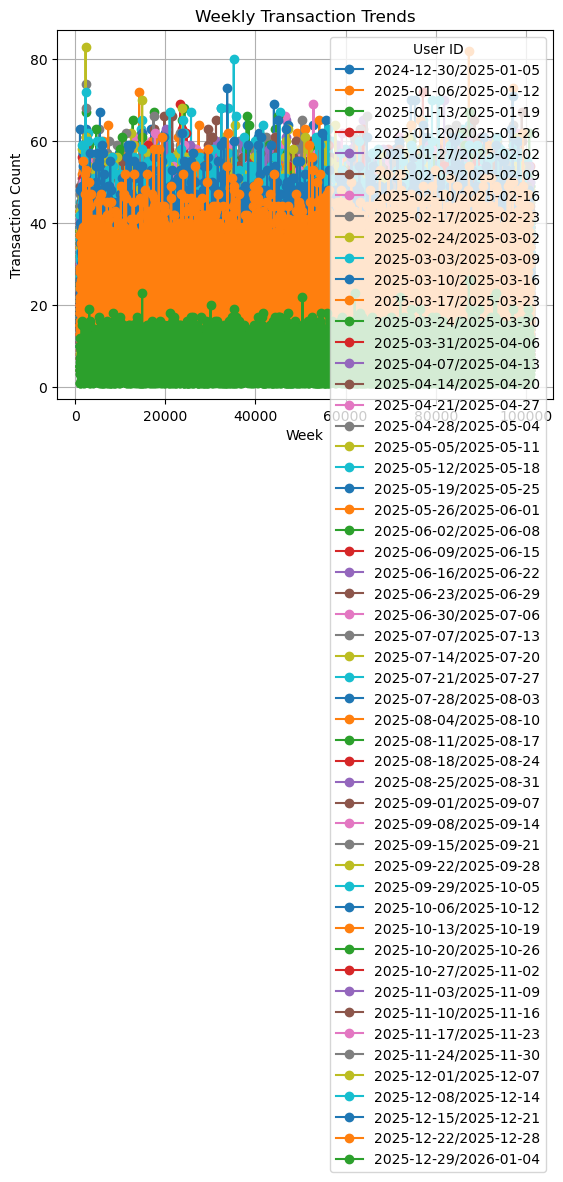

<Figure size 1200x600 with 0 Axes>

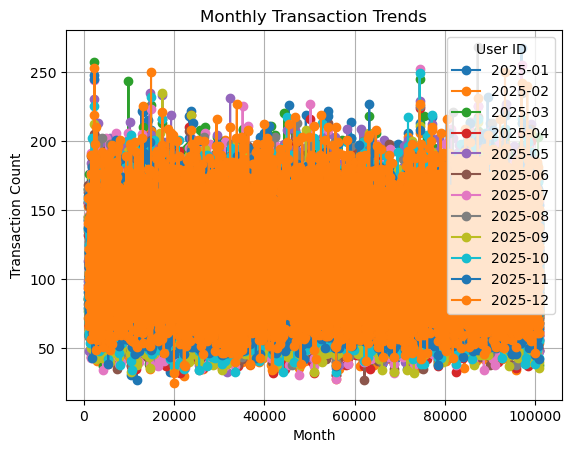

<Figure size 1200x600 with 0 Axes>

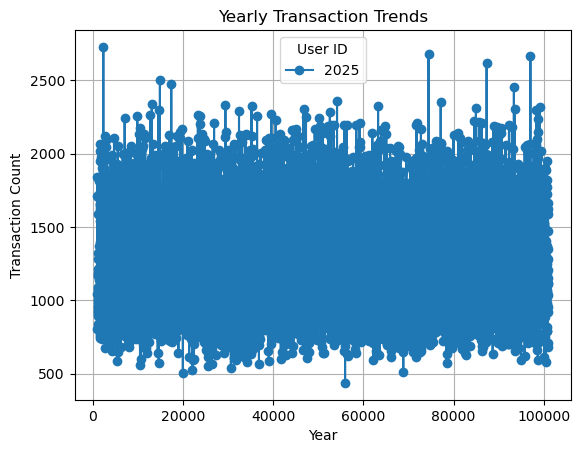

In [103]:
import matplotlib.pyplot as plt

# Visualize Weekly Transaction Trends
plt.figure(figsize=(12, 6))
weekly_transaction_summary['to_randomly_generated_account'].unstack().plot(kind='line', marker='o')
plt.title('Weekly Transaction Trends')
plt.xlabel('Week')
plt.ylabel('Transaction Count')
plt.legend(title='User ID')
plt.grid(True)
plt.show()

# Visualize Monthly Transaction Trends
plt.figure(figsize=(12, 6))
monthly_transaction_summary['to_randomly_generated_account'].unstack().plot(kind='line', marker='o')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.legend(title='User ID')
plt.grid(True)
plt.show()

# Visualize Yearly Transaction Trends
plt.figure(figsize=(12, 6))
yearly_transaction_summary['to_randomly_generated_account'].unstack().plot(kind='line', marker='o')
plt.title('Yearly Transaction Trends')
plt.xlabel('Year')
plt.ylabel('Transaction Count')
plt.legend(title='User ID')
plt.grid(True)
plt.show()

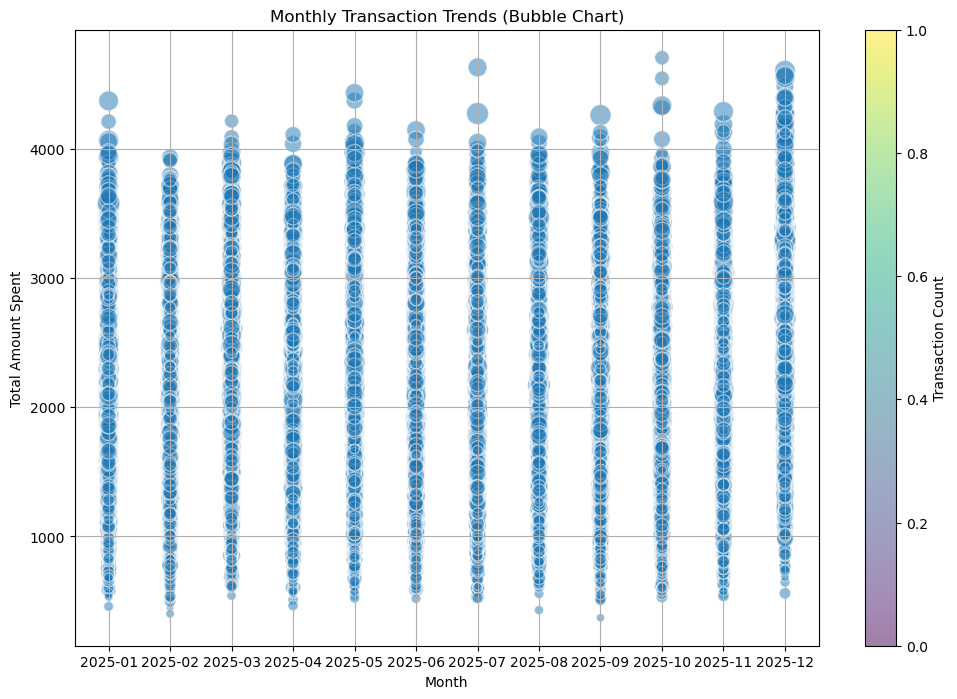

In [105]:
# Assuming 'data' is your DataFrame containing transactional data

# Extracting year and month from the MultiIndex and converting to strings
years = monthly_transaction_summary.index.get_level_values(0).astype(str)
months = monthly_transaction_summary.index.get_level_values(1).strftime('%Y-%m')

# Calculating bubble sizes based on transaction counts
sizes = monthly_transaction_summary['to_randomly_generated_account'].values

# Plotting the bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(months,  # X-axis: months
            monthly_transaction_summary['monopoly_money_amount'],  # Y-axis: total amount spent
            s=sizes,  # Bubble sizes
            alpha=0.5,  # Transparency
            cmap='viridis',  # Color map
            marker='o',  # Marker shape
            edgecolors='w',  # Edge color for bubbles
            linewidth=1)  # Edge width

# Adding labels and title
plt.title('Monthly Transaction Trends (Bubble Chart)')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.colorbar(label='Transaction Count')

# Display the bubble chart
plt.grid(True)
plt.show()


In [106]:
# Assuming you have already calculated weekly_transaction_counts, monthly_transaction_counts, and yearly_transaction_counts as shown in the previous code snippet

# Top 10 users based on weekly transaction counts
top_10_weekly_users = (weekly_transaction_counts.groupby('from_totally_fake_account').sum()
                       .nlargest(10)
                       .reset_index()
                       .rename(columns={0: 'weekly_transaction_count'}))

# Top 10 users based on monthly transaction counts
top_10_monthly_users = (monthly_transaction_counts.groupby('from_totally_fake_account').sum()
                        .nlargest(10)
                        .reset_index()
                        .rename(columns={0: 'monthly_transaction_count'}))

# Top 10 users based on yearly transaction counts
top_10_yearly_users = (yearly_transaction_counts.groupby('from_totally_fake_account').sum()
                       .nlargest(10)
                       .reset_index()
                       .rename(columns={0: 'yearly_transaction_count'}))

# Displaying the top 10 users for each period
print("Top 10 Users based on Weekly Transaction Counts:\n", top_10_weekly_users)
print("\nTop 10 Users based on Monthly Transaction Counts:\n", top_10_monthly_users)
print("\nTop 10 Users based on Yearly Transaction Counts:\n", top_10_yearly_users)


Top 10 Users based on Weekly Transaction Counts:
    from_totally_fake_account  weekly_transaction_count
0                     2331.0                      2728
1                    74448.0                      2679
2                    97033.0                      2665
3                    87324.0                      2619
4                    14877.0                      2503
5                    17398.0                      2477
6                    93372.0                      2457
7                    54155.0                      2362
8                    77136.0                      2352
9                    13069.0                      2337

Top 10 Users based on Monthly Transaction Counts:
    from_totally_fake_account  monthly_transaction_count
0                     2331.0                       2728
1                    74448.0                       2679
2                    97033.0                       2665
3                    87324.0                       2619
4            

In [46]:
### its taking differnt diif.. before grouping

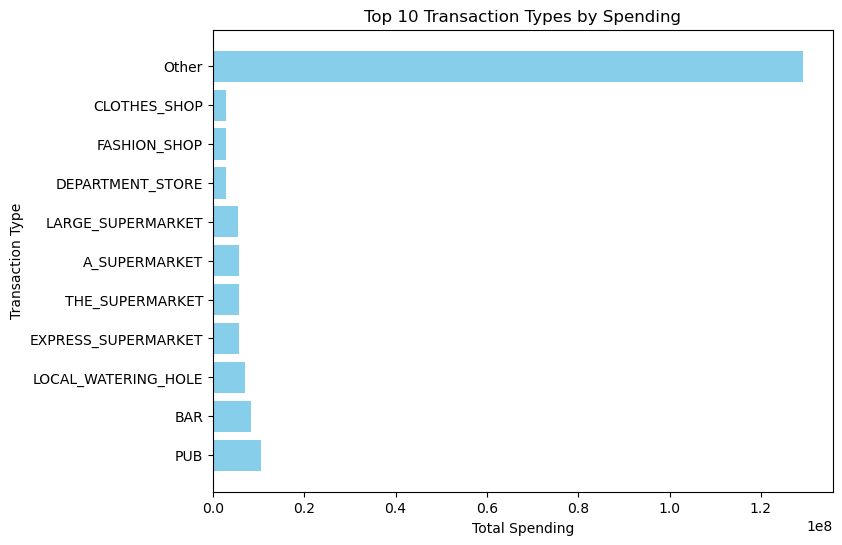

In [45]:
import matplotlib.pyplot as plt

# Get unique transaction types
transaction_types = data['to_randomly_generated_account'].unique()

# Calculate total spending for each transaction type
total_spending = data.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum()

# Sort the transaction types based on total spending
sorted_transaction_types = total_spending.sort_values(ascending=False).index

# Choose the top N transaction types to display
top_n = 10
top_transaction_types = sorted_transaction_types[:top_n]

# Aggregate the rest of the transaction types into an "Other" category
other_spending = total_spending[sorted_transaction_types[top_n:]].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.barh(list(top_transaction_types) + ['Other'], list(total_spending[top_transaction_types]) + [other_spending], color='skyblue')
plt.xlabel('Total Spending')
plt.ylabel('Transaction Type')
plt.title(f'Top {top_n} Transaction Types by Spending')
plt.show()


In [42]:
import plotly.graph_objects as go

# Get unique transaction types
transaction_types = data['to_randomly_generated_account'].unique()

# Calculate total spending for each transaction type
total_spending = data.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum()

# Sort the transaction types based on total spending
sorted_transaction_types = total_spending.sort_values(ascending=False).index

# Choose the top N transaction types to display
top_n = 10
top_transaction_types = sorted_transaction_types[:top_n]

# Aggregate the rest of the transaction types into an "Other" category
other_spending = total_spending[sorted_transaction_types[top_n:]].sum()

# Create figure
fig = go.Figure()

# Add bar trace for top transaction types
fig.add_trace(go.Bar(
    x=list(top_transaction_types) + ['Other'],
    y=list(total_spending[top_transaction_types]) + [other_spending],
    marker_color='green'
))

# Update layout
fig.update_layout(
    title=f'Top {top_n} Transaction Types by Spending',
    xaxis_title='Transaction Type',
    yaxis_title='Total Spending'
)

# Show figure
fig.show()


In [47]:
## categorising

In [49]:
# Define keywords for grouping
transaction_keywords = {
    'coffee': ['CAFE', 'COFFEE_SHOP', 'A_CAFE', 'TOTALLY_A_REAL_COFFEE_SHOP', 'GOURMET_COFFEE_SHOP', 'HIPSTER_COFFEE_SHOP'],
    'restaurant': ['LOCAL_RESTAURANT', 'INDIAN_RESTAURANT', 'STEAK_HOUSE', 'SEAFOOD_RESAURANT'],
    'pub_bar': ['LOCAL_WATERING_HOLE', 'BAR', 'PUB', 'WHISKEY_BAR', 'COCKTAIL_BAR', 'G&T_BAR'],
    'shop': ['TOY_SHOP', 'COMIC_BOOK_SHOP', 'ELECTRONICS_SHOP', 'FASHION_SHOP', 'FASHIONABLE_SPORTSWARE_SHOP', 'SCHOOL_SUPPLY_STORE', 'LOCAL_BOOKSHOP', 'TRAINER_SHOP', 'BOOKSHOP', 'KIDS_ACTIVITY_CENTRE', 'VIDEO_GAME_STORE', 'CLOTHES_SHOP', 'TECH_SHOP', 'DIY_STORE', 'COOKSHOP', 'HOME_IMPROVEMENT_STORE', 'CHINESE_TAKEAWAY', 'SECOND_HAND_BOOKSHOP', 'GREENGROCER', 'JEWLLERY_SHOP', 'ACCESSORY_SHOP', 'KIDS_CLOTHING_SHOP', 'SPORT_SHOP', 'HIPSTER_ELECTRONICS_SHOP', 'CHINESE_RESTAURANT'],
    'entertainment': ['CINEMA', 'DVD_SHOP'],
    'supermarket': ['DEPARTMENT_STORE', 'LARGE_SUPERMARKET', 'EXPRESS_SUPERMARKET', 'A_SUPERMARKET', 'THE_SUPERMARKET'],
    'others': ['LUNCH_VAN', 'RESTAURANT_VOUCHER', 'ROASTERIE', 'LIQUOR_STORE', 'TO_BEAN_OR_NOT_TO_BEAN', 'WINE_CELLAR', 'WE_HAVE_BEAN_WEIGHTING', 'FLORIST', 'TURKEY_FARM']
}

# Function to assign category based on keywords
def assign_category(transaction):
    for category, keywords in transaction_keywords.items():
        for keyword in keywords:
            if keyword in transaction:
                return category
    return 'others'

# Apply the function to create a new column 'transaction_category'
data['transaction_category'] = data['to_randomly_generated_account'].apply(assign_category)

# Display the first few rows of the updated dataframe
print(data[['to_randomly_generated_account', 'transaction_category']].head(5))


  to_randomly_generated_account transaction_category
0                        CINEMA        entertainment
1                         40544               others
2                         85149               others
3           HIPSTER_COFFEE_SHOP               coffee
4                         18555               others


In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

# Load the dataset
data = pd.read_csv('fake_transactional_data_24.csv')

# Display the head of the dataset
print(data.head())

# Encode categorical variables
label_encoder = LabelEncoder()
data['to_randomly_generated_account'] = label_encoder.fit_transform(data['to_randomly_generated_account'])

# Convert 'not_happened_yet_date' column to datetime
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')

# Extract datetime features
data['year'] = data['not_happened_yet_date'].dt.year
data['month'] = data['not_happened_yet_date'].dt.month
data['day'] = data['not_happened_yet_date'].dt.day

# Drop non-numeric columns
X = data.drop(columns=['not_happened_yet_date'])

# Scale numerical variables
scaler = StandardScaler()
X[['from_totally_fake_account', 'monopoly_money_amount']] = scaler.fit_transform(X[['from_totally_fake_account', 'monopoly_money_amount']])

# Split the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Define autoencoder architecture
input_dim = X_train.shape[1]  # Dimension of input data
latent_dim = 64  # Dimension of latent space

# Encoder
inputs = Input(shape=(input_dim,))
encoded = Dense(latent_dim, activation='relu')(inputs)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Convert pandas DataFrame to NumPy array
X_train = X_train.values
X_test = X_test.values

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=1, batch_size=32, validation_data=(X_test, X_test))

# Extract latent space representation
encoder = Model(inputs, encoded)
latent_representation_train = encoder.predict(X_train)
latent_representation_test = encoder.predict(X_test)

# Apply clustering algorithm (e.g., K-means) to latent space representation
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(latent_representation_train)

# Predict clusters for test data
clusters_test = kmeans.predict(latent_representation_test)

# Add cluster labels to test data
X_test_with_clusters = pd.DataFrame(X_test, columns=X.columns)  # Convert back to DataFrame
X_test_with_clusters['cluster'] = clusters_test

# Display the clustered test data
print(X_test_with_clusters.head())


   from_totally_fake_account  monopoly_money_amount  \
0                    10371.0                   4.00   
1                    88339.0                   2.40   
2                    18555.0                   2.40   
3                    18555.0                   4.10   
4                    80792.0                   1.95   

  to_randomly_generated_account not_happened_yet_date  
0                        CINEMA            01/01/2025  
1                         40544            01/01/2025  
2                         85149            01/01/2025  
3           HIPSTER_COFFEE_SHOP            01/01/2025  
4                         18555            01/01/2025  
63427/63427 [==============================] - 146s 2ms/step


KeyboardInterrupt: 

In [ ]:
## , format='%d/%m/%Y'

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the dataset
data = pd.read_csv('fake_transactional_data_24.csv')

# Display the head of the dataset
print(data.head())

# Encode categorical variables
label_encoder = LabelEncoder()
data['to_randomly_generated_account'] = label_encoder.fit_transform(data['to_randomly_generated_account'])

# Convert 'not_happened_yet_date' column to datetime
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')

# Scale numerical variables
scaler = StandardScaler()
data[['from_totally_fake_account', 'monopoly_money_amount']] = scaler.fit_transform(data[['from_totally_fake_account', 'monopoly_money_amount']])

# Split the data into train and test sets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Ensure all data is numerical before training the autoencoder
X_train = X_train.drop(columns=['not_happened_yet_date'])  # Drop non-numeric column
X_test = X_test.drop(columns=['not_happened_yet_date'])  # Drop non-numeric column

# Convert pandas DataFrame to NumPy array
X_train = X_train.values
X_test = X_test.values

# Define autoencoder architecture
input_dim = X_train.shape[1]  # Dimension of input data
latent_dim = 64  # Dimension of latent space

# Encoder
inputs = Input(shape=(input_dim,))
encoded = Dense(latent_dim, activation='relu')(inputs)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Extract latent space representation
encoder = Model(inputs, encoded)
latent_representation_train = encoder.predict(X_train)
latent_representation_test = encoder.predict(X_test)

# Apply clustering algorithm (e.g., K-means) to latent space representation
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
kmeans.fit(latent_representation_train)

# Predict clusters for test data
clusters_test = kmeans.predict(latent_representation_test)

# Add cluster labels to test data
X_test = pd.DataFrame(X_test, columns=data.columns.drop('not_happened_yet_date'))  # Convert back to DataFrame
X_test['cluster'] = clusters_test

# Display the clustered test data
print(X_test.head())


   from_totally_fake_account  monopoly_money_amount  \
0                    10371.0                   4.00   
1                    88339.0                   2.40   
2                    18555.0                   2.40   
3                    18555.0                   4.10   
4                    80792.0                   1.95   

  to_randomly_generated_account not_happened_yet_date  
0                        CINEMA            01/01/2025  
1                         40544            01/01/2025  
2                         85149            01/01/2025  
3           HIPSTER_COFFEE_SHOP            01/01/2025  
4                         18555            01/01/2025  
Epoch 1/10

253707/253707 [==============================] - 738s 3ms/step - loss: 56428212.0000 - val_loss: 56387604.0000
Epoch 2/10
127895/253707 [==============>...............] - ETA: 4:59 - loss: 56432752.0000

KeyboardInterrupt: 